In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter = 300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [2]:
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)

(150,)


In [3]:
irisDF['silhouette_coeff'] = score_samples

In [4]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [5]:
average_score = silhouette_score(iris.data, irisDF['cluster'])
print(average_score)

0.5528190123564091


<AxesSubplot:>

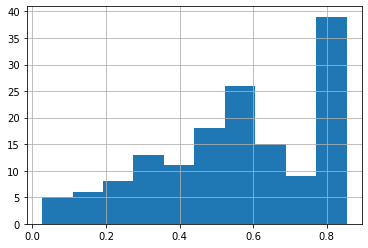

In [6]:
irisDF['silhouette_coeff'].hist()

In [7]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64